<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction
Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions 


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



In [1]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install sqlalchemy==1.3.9


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [3]:
%load_ext sql

In [4]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [5]:
!pip install -q pandas==1.1.5

In [6]:
%sql sqlite:///my_data1.db

'Connected: @my_data1.db'

In [9]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

**Note:This below code is added to remove blank rows from table**


In [10]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
(sqlite3.OperationalError) table SPACEXTABLE already exists
[SQL: create table SPACEXTABLE as select * from SPACEXTBL where Date is not null]
(Background on this error at: http://sqlalche.me/e/e3q8)


## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [12]:
%%sql
select distinct LAUNCH_SITE
from SPACEXTBL;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 


In [13]:
%%sql
select *
from SPACEXTBL 
where LAUNCH_SITE like "CCA%"
limit 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-04-06,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-08-12,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-08-10,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-01-03,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [16]:
%%sql
select Customer, sum(PAYLOAD_MASS__KG_) as Total_NASA_CRS_mass
from SPACEXTBL
where Customer = "NASA (CRS)";

 * sqlite:///my_data1.db
Done.


Customer,Total_NASA_CRS_mass
NASA (CRS),45596


### Task 4




##### Display average payload mass carried by booster version F9 v1.1


In [20]:
%%sql
select Booster_Version, avg(PAYLOAD_MASS__KG_) as avg_Booster_versionF9_v1_1
from SPACEXTBL
where Booster_Version = "F9 v1.1";

 * sqlite:///my_data1.db
Done.


Booster_Version,avg_Booster_versionF9_v1_1
F9 v1.1,2928.4


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


In [23]:
%%sql
select  Mission_Outcome, min(Date) as Date_First_Succ_Land
from SPACEXTBL
where Landing_Outcome ='Success (ground pad)';

 * sqlite:///my_data1.db
Done.


Mission_Outcome,Date_First_Succ_Land
Success,2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [24]:
%%sql
select Booster_Version,Landing_Outcome, PAYLOAD_MASS__KG_
from SPACEXTBL
where (PAYLOAD_MASS__KG_ > 4000 and PAYLOAD_MASS__KG_ < 6000) 
      and Landing_Outcome = 'Success (drone ship)';

 * sqlite:///my_data1.db
Done.


Booster_Version,Landing_Outcome,PAYLOAD_MASS__KG_
F9 FT B1022,Success (drone ship),4696
F9 FT B1026,Success (drone ship),4600
F9 FT B1021.2,Success (drone ship),5300
F9 FT B1031.2,Success (drone ship),5200


### Task 7




##### List the total number of successful and failure mission outcomes


In [27]:
%%sql
select Mission_Outcome, count(Mission_Outcome) as "Total (Success or failure)"
from SPACEXTBL
GROUP BY MISSION_OUTCOME;

 * sqlite:///my_data1.db
Done.


Mission_Outcome,Total (Success or failure)
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


### Task 8



##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [28]:
%%sql
select Booster_Version,Landing_Outcome, PAYLOAD_MASS__KG_
from SPACEXTBL
where PAYLOAD_MASS__KG_ in (select max(PAYLOAD_MASS__KG_) 
                            from SPACEXTBL);

 * sqlite:///my_data1.db
Done.


Booster_Version,Landing_Outcome,PAYLOAD_MASS__KG_
F9 B5 B1048.4,Success,15600
F9 B5 B1049.4,Success,15600
F9 B5 B1051.3,Success,15600
F9 B5 B1056.4,Failure,15600
F9 B5 B1048.5,Failure,15600
F9 B5 B1051.4,Success,15600
F9 B5 B1049.5,Success,15600
F9 B5 B1060.2,Success,15600
F9 B5 B1058.3,Success,15600
F9 B5 B1051.6,Success,15600


### Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 4, 2) as month to get the months and substr(Date,7,4)='2015' for year.**


In [29]:
%%sql
SELECT  Date, Booster_Version, Launch_Site, Landing_Outcome 
FROM SPACEXTBL
where Landing_Outcome= 'Failure (drone ship)' and Date <= "2015-12-31";

 * sqlite:///my_data1.db
Done.


Date,Booster_Version,Launch_Site,Landing_Outcome
2015-10-01,F9 v1.1 B1012,CCAFS LC-40,Failure (drone ship)
2015-04-14,F9 v1.1 B1015,CCAFS LC-40,Failure (drone ship)


### Task 10




##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


In [30]:
%%sql
select Landing_Outcome, count(Landing_Outcome) as "Total Count"
from SPACEXTBL
where Landing_Outcome = "Failure (drone ship)" or Landing_Outcome = "Success (ground pad)" and
Date between "2010-06-04" and "2017-03-20"
GROUP BY Landing_Outcome
order by Landing_Outcome desc;

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Total Count
Success (ground pad),5
Failure (drone ship),5


### Reference Links

* <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>  

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*  <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb">Hands-on Lab: Analyzing a real World Data Set</a>




## Author(s)

<h4> Lakshmi Holla </h4>


## Other Contributors

<h4> Rav Ahuja </h4>


## Change log
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2021-07-09 | 0.2 |Lakshmi Holla | Changes made in magic sql|
| 2021-05-20 | 0.1 |Lakshmi Holla | Created Initial Version |


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>


<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


<Figure size 2000x1400 with 0 Axes>

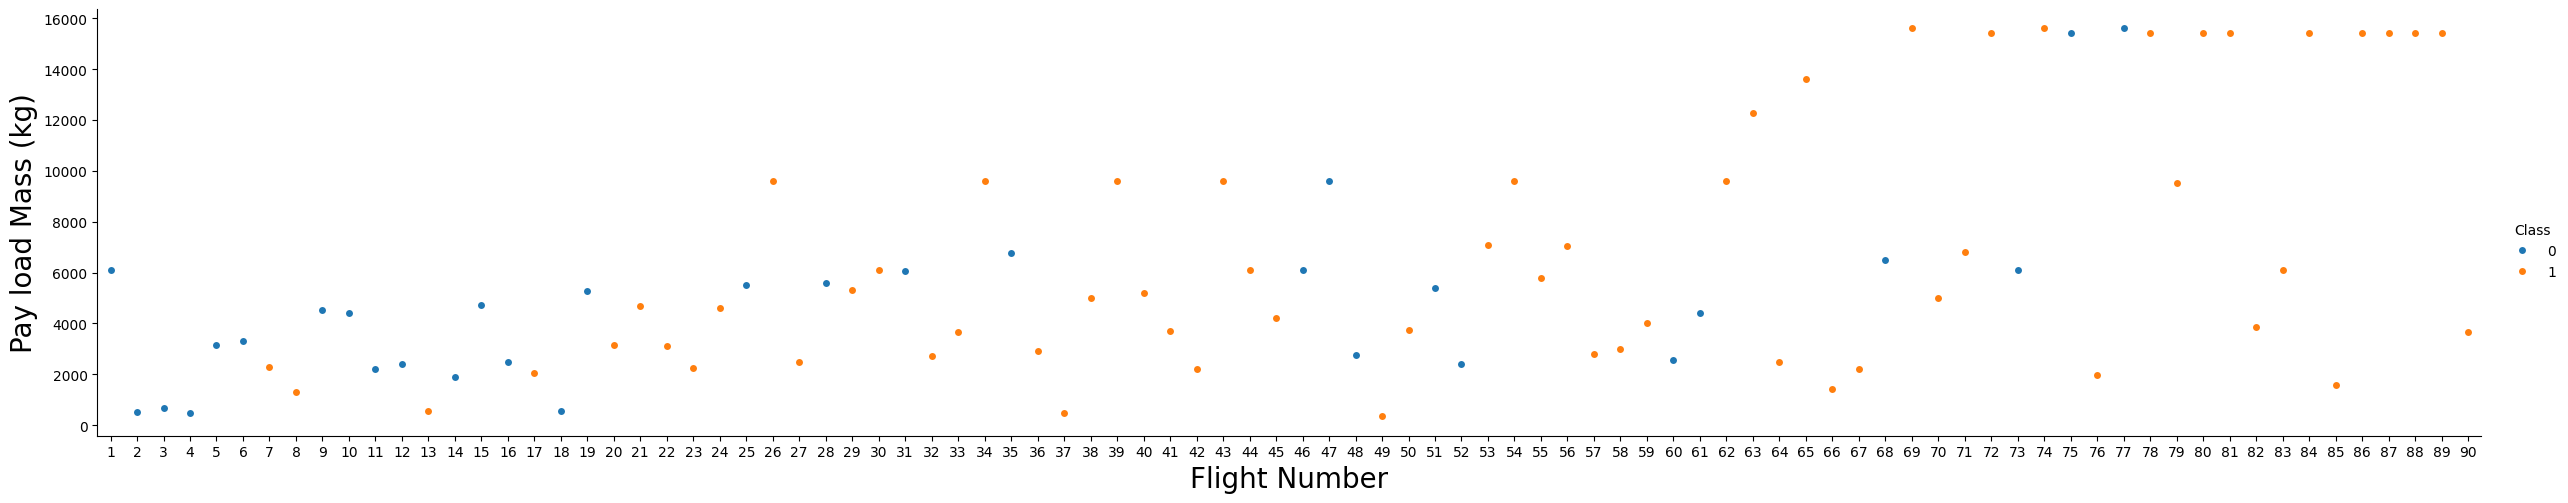

In [3]:
plt.figure(figsize=(20,14))
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

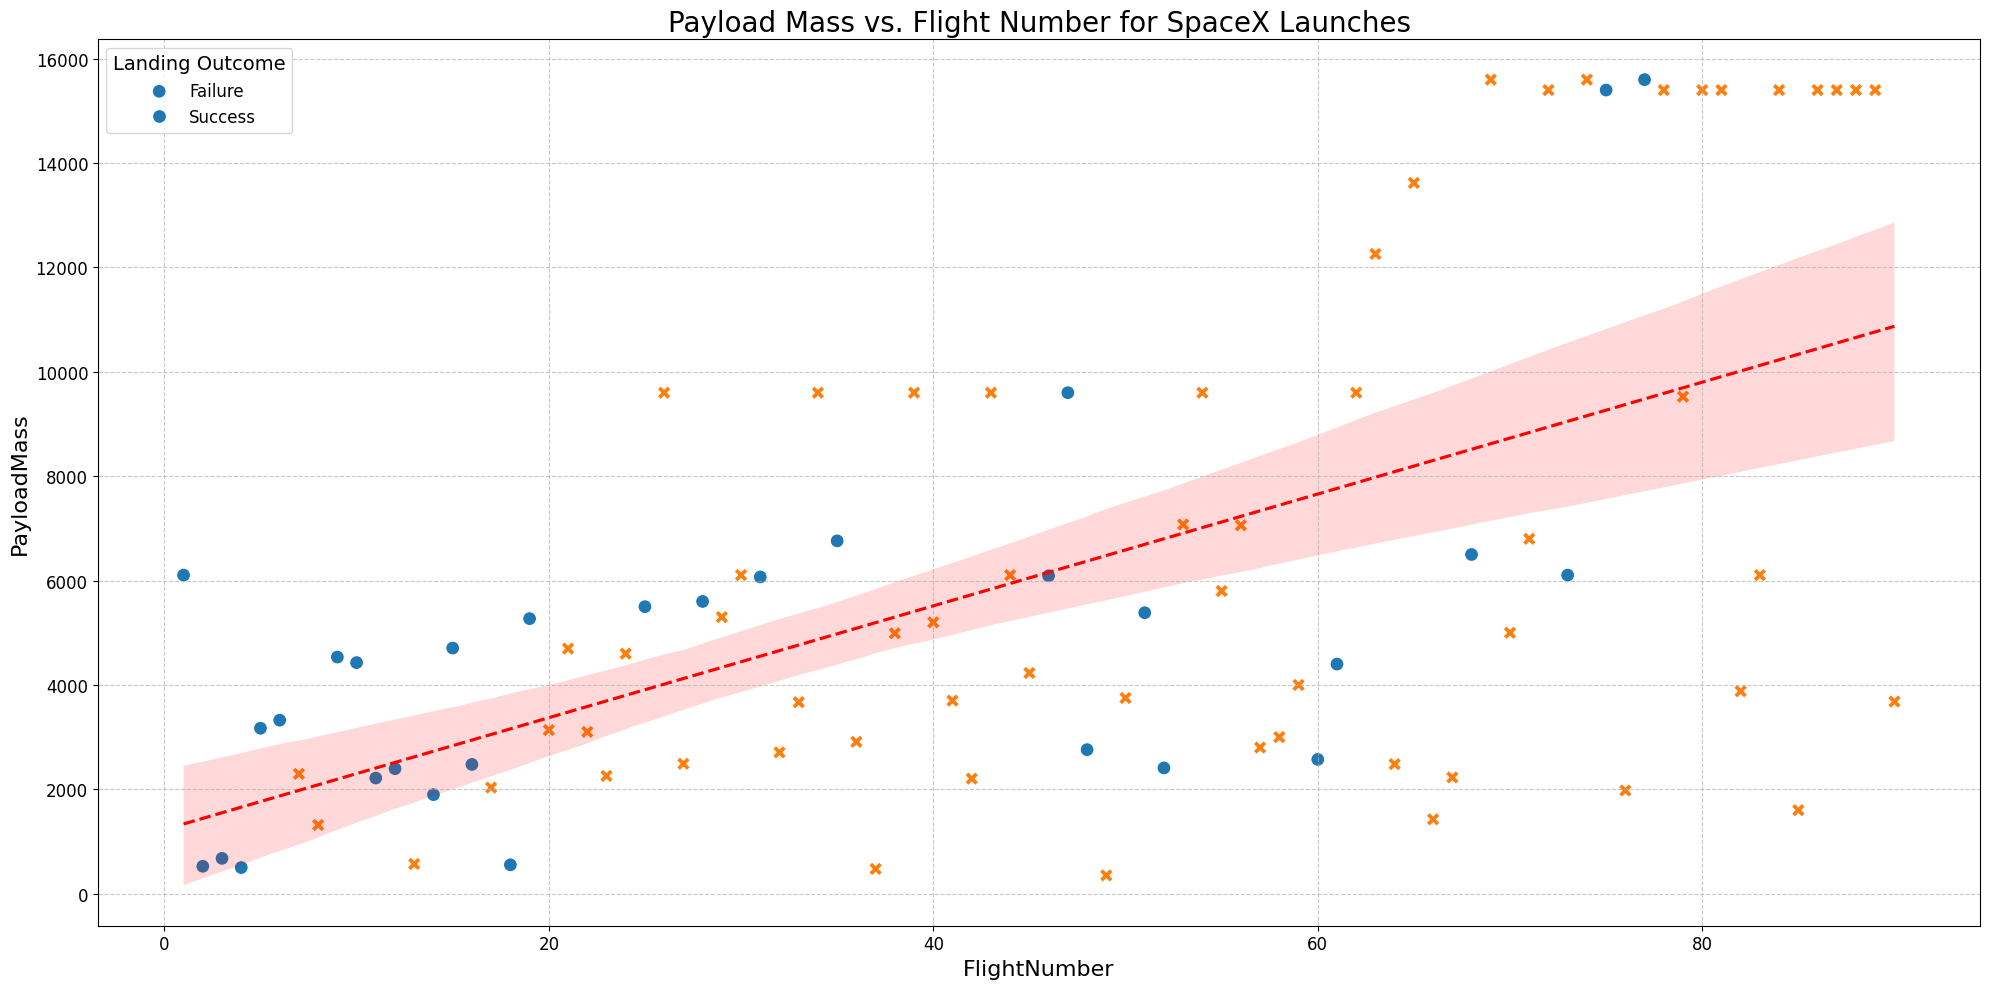

In [4]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="FlightNumber", y="PayloadMass", hue="Class", style="Class", s=100)

plt.xlabel("Flight Number", fontsize=16)
plt.ylabel("Payload Mass (kg)", fontsize=16)
plt.title("Payload Mass vs. Flight Number for SpaceX Launches", fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Landing Outcome", labels=["Failure", "Success"], title_fontsize=14, fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

# Add a trend line
sns.regplot(data=df, x="FlightNumber", y="PayloadMass", scatter=False, color="red", line_kws={"linestyle": "--"})

plt.tight_layout()
plt.show()

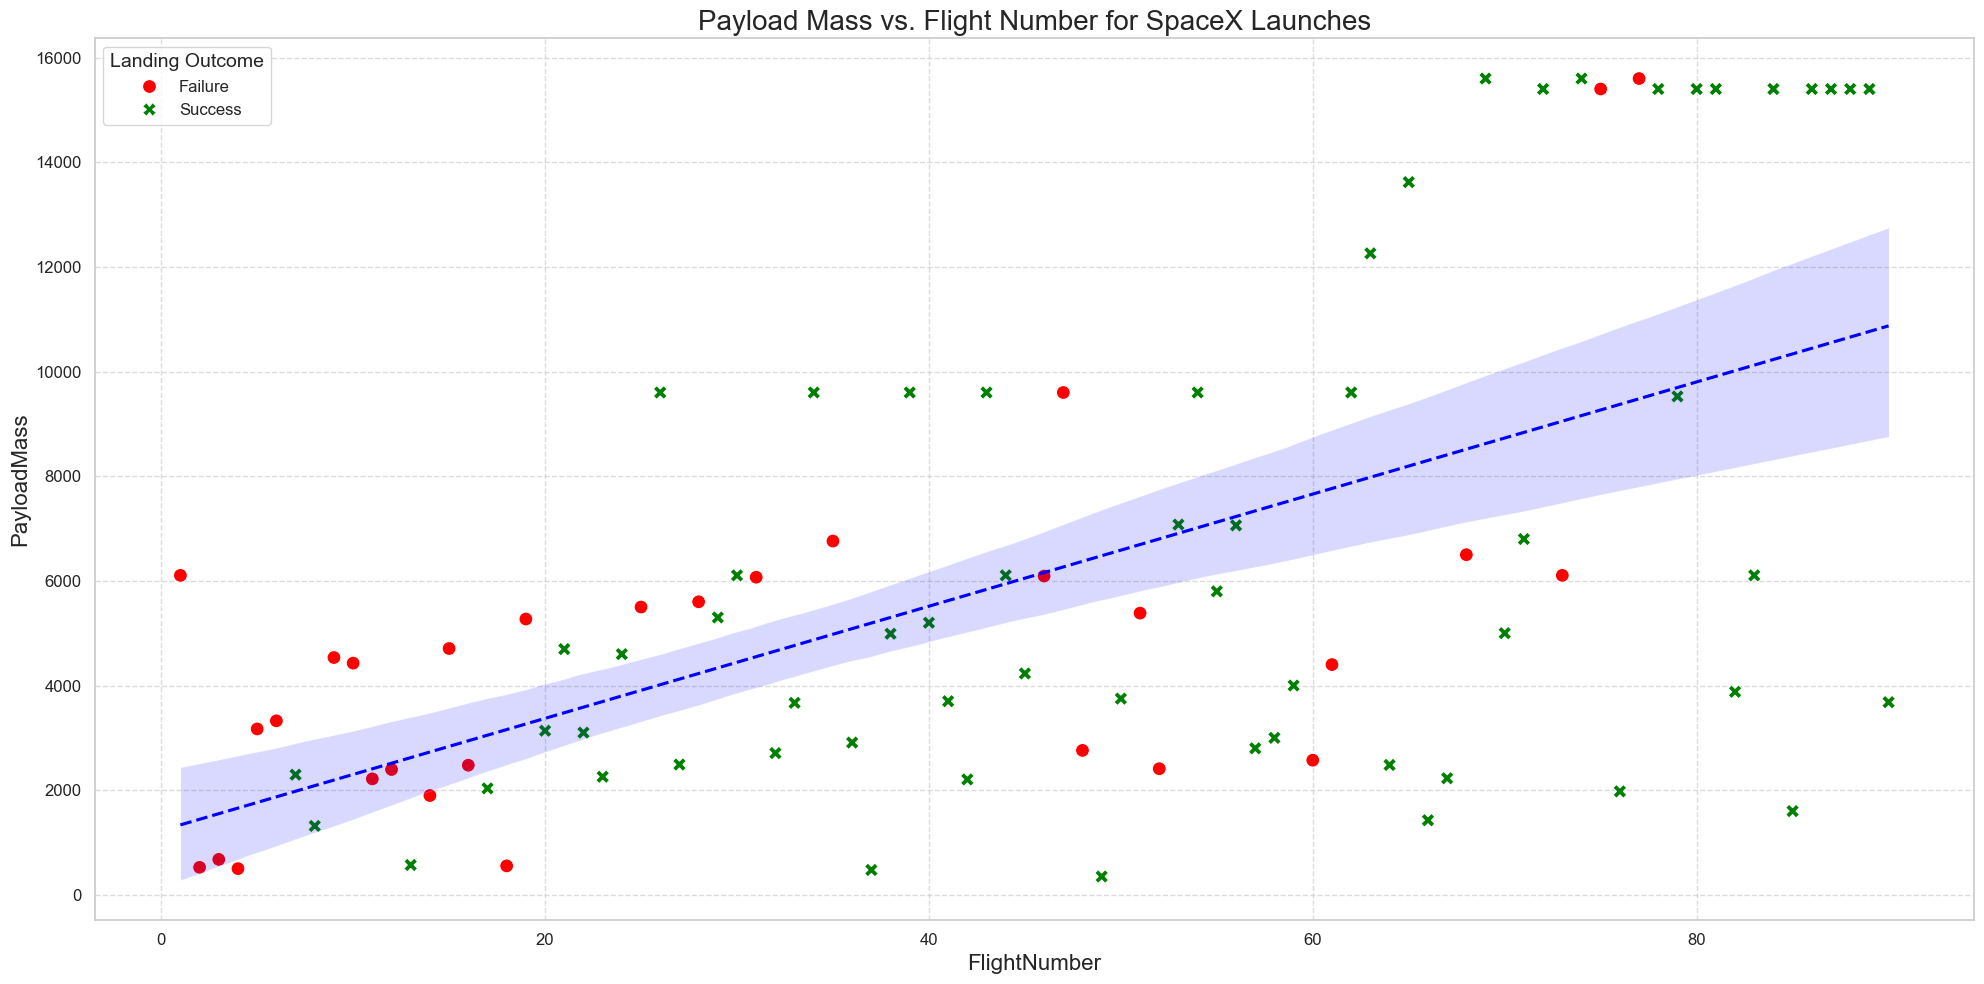

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(20, 10))

# Custom colors
colors = {0: "red", 1: "green"}

# Scatter plot
sns.scatterplot(data=df, x="FlightNumber", y="PayloadMass", hue="Class", style="Class", s=100, palette=colors)

plt.xlabel("Flight Number", fontsize=16)
plt.ylabel("Payload Mass (kg)", fontsize=16)
plt.title("Payload Mass vs. Flight Number for SpaceX Launches", fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize legend
legend_labels = {0: "Failure", 1: "Success"}
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plt.legend(handles, new_labels, title="Landing Outcome", title_fontsize=14, fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

# Add a trend line
sns.regplot(data=df, x="FlightNumber", y="PayloadMass", scatter=False, color="blue", line_kws={"linestyle": "--"})

plt.tight_layout()
plt.show()


We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


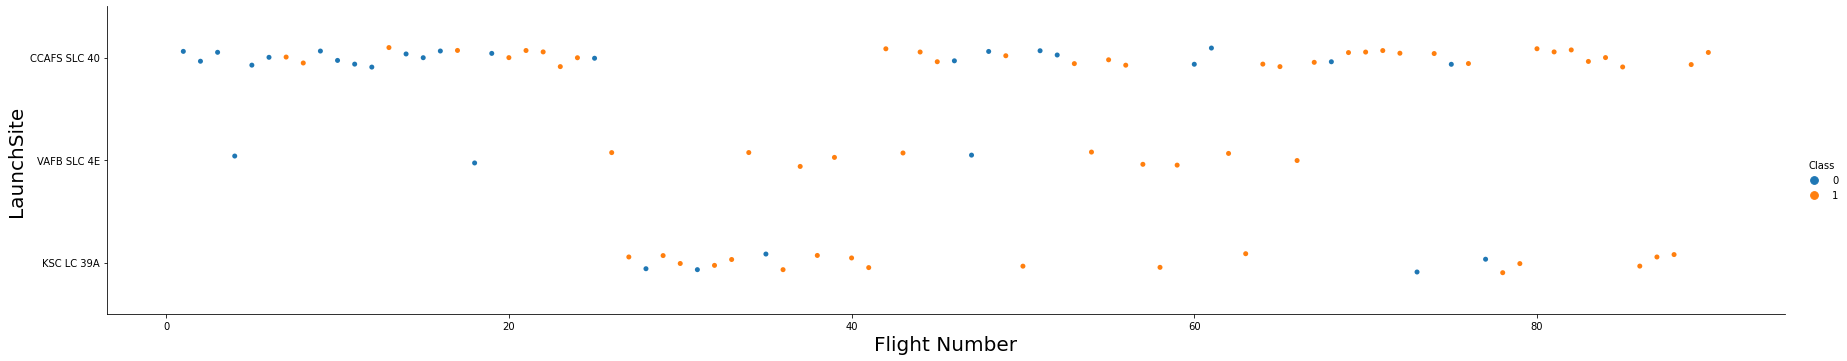

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='FlightNumber', hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

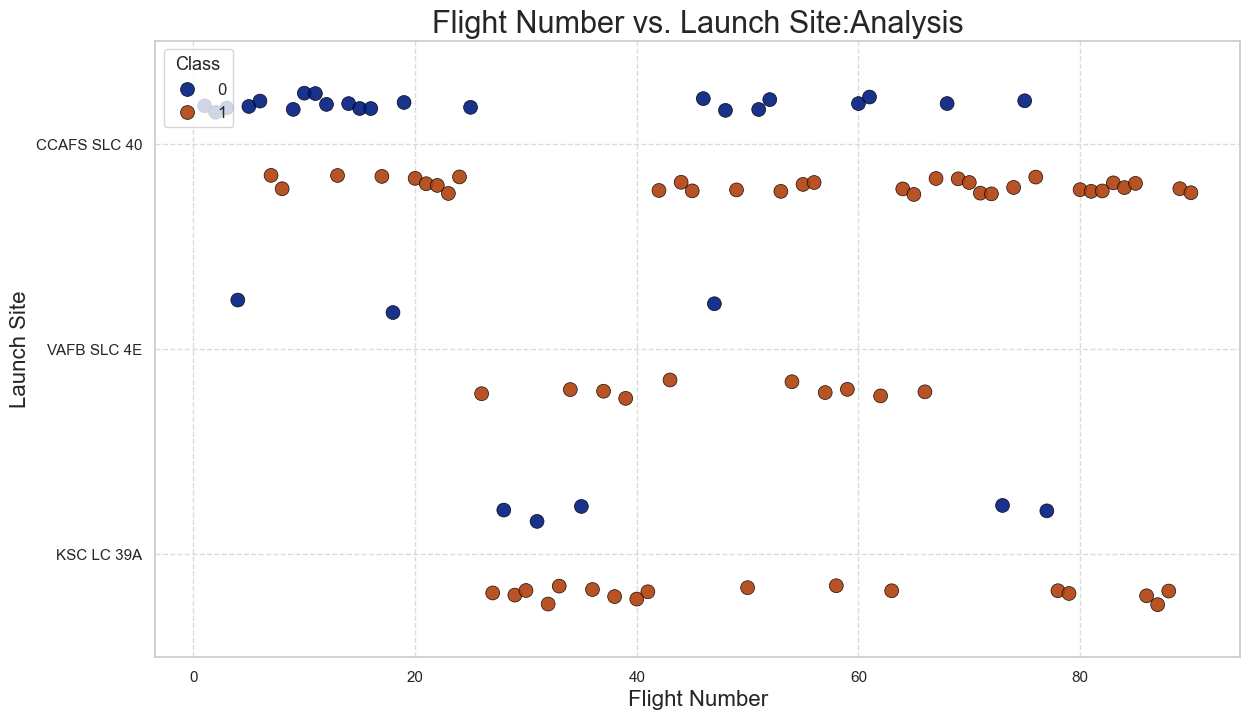

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the plot with adjusted visibility settings
plt.figure(figsize=(14, 8))  # Set the size of the figure
ax = sns.stripplot(
    y='LaunchSite', 
    x='FlightNumber', 
    hue='Class', 
    data=df, 
    dodge=True,  # Separate classes for better visualization
    jitter=True,  # Add jitter to prevent overlapping of points
    palette='dark',  # Use a distinct color palette
    size=10,  # Increase the size of the points
    alpha=0.9,  # Set opacity to make points more visible
    edgecolor='black',  # Add a black edge to the points
    linewidth=0.5  # Set edge thickness
)

# Add title and labels with increased font size
plt.title('Flight Number vs. Launch Site:Analysis', fontsize=22)
plt.xlabel('Flight Number', fontsize=16)
plt.ylabel('Launch Site', fontsize=16)

# Customize legend
plt.legend(title='Class', title_fontsize='13', loc='upper left', fontsize='12')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


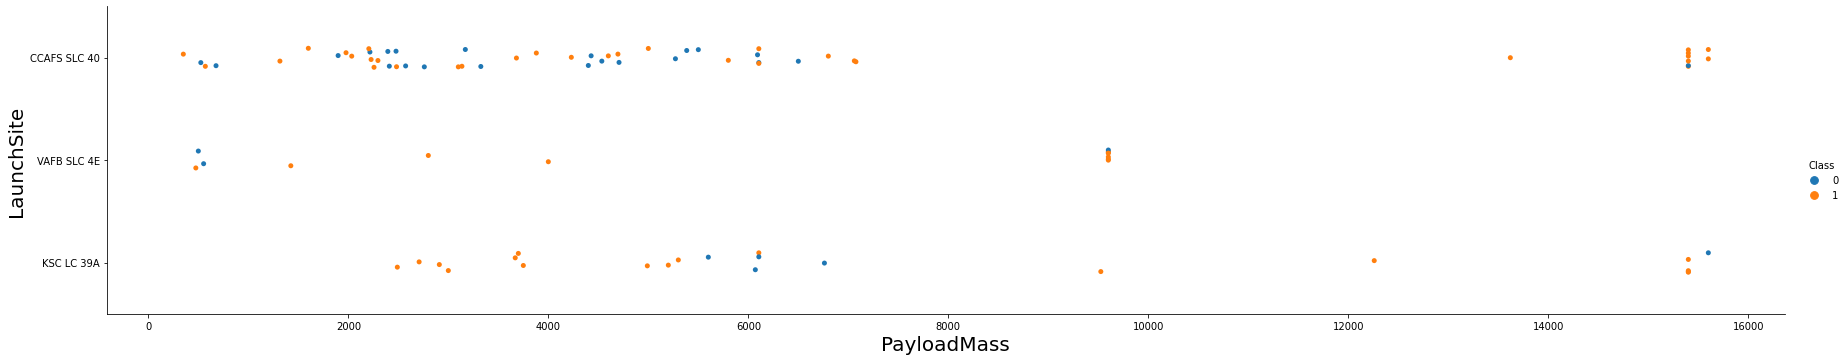

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

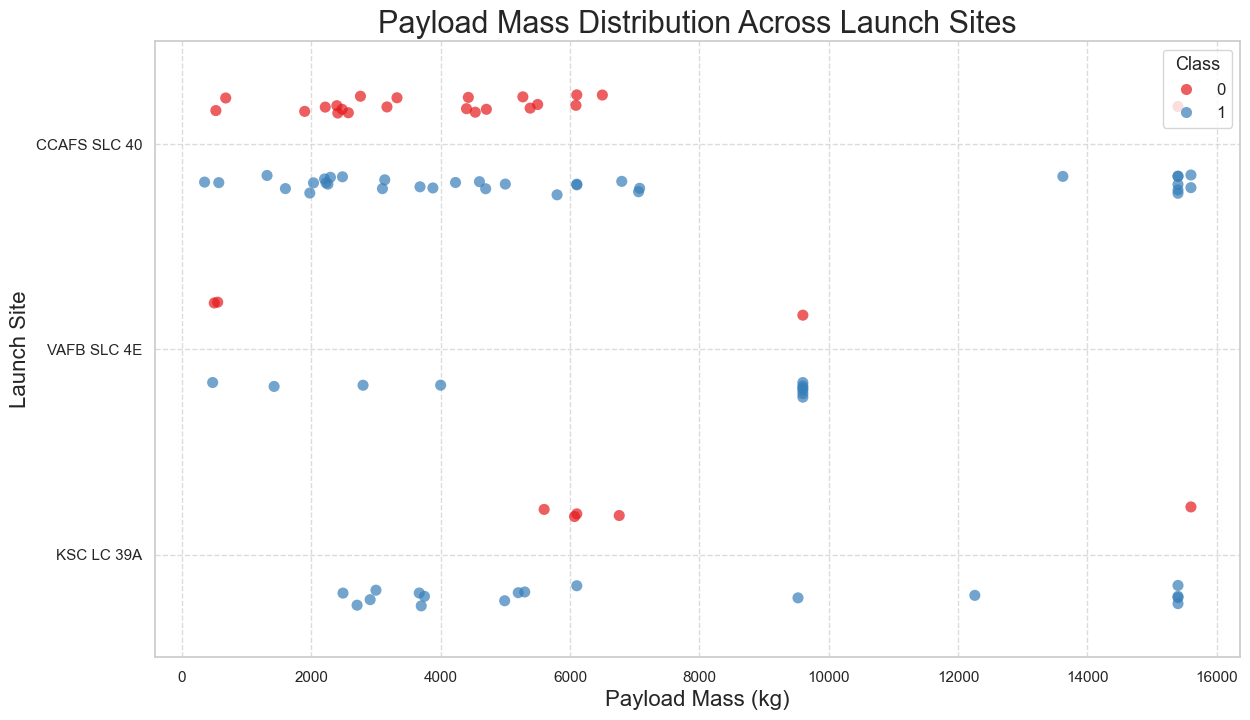

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame with the relevant data

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a strip plot with improved aesthetics
plt.figure(figsize=(14, 8))
ax = sns.stripplot(
    y="LaunchSite",
    x="PayloadMass",
    hue="Class",
    data=df,
    dodge=True, # Separate the hues for better distinction
    jitter=True, # Add jitter to avoid overlap
    palette="Set1", # Use a distinct color palette
    size=8, # Set the size of the points
    alpha=0.7 # Transparency of the points
)

# Add a descriptive title
plt.title("Payload Mass Distribution Across Launch Sites", fontsize=22)

# Add axis labels
plt.xlabel("Payload Mass (kg)", fontsize=16)
plt.ylabel("Launch Site", fontsize=16)

# Customize legend
plt.legend(title='Class', title_fontsize='13', loc='upper right', fontsize='12')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [10]:
# HINT use groupby method on Orbit column and get the mean of Class column
df.groupby(['Orbit'])['Class'].mean()

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

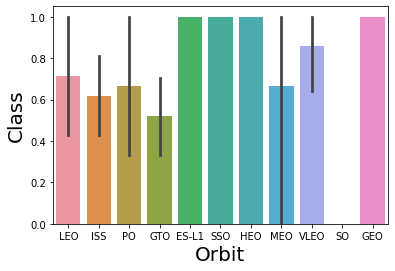

In [16]:
sns.barplot(x='Orbit', y='Class', data=df)
plt.xlabel('Orbit',fontsize=20)
plt.ylabel("Class",fontsize=20)
plt.show()

C:\Users\navee\AppData\Local\Temp\ipykernel_24836\2450524571.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\navee\AppData\Local\Temp\ipykernel_24836\2450524571.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


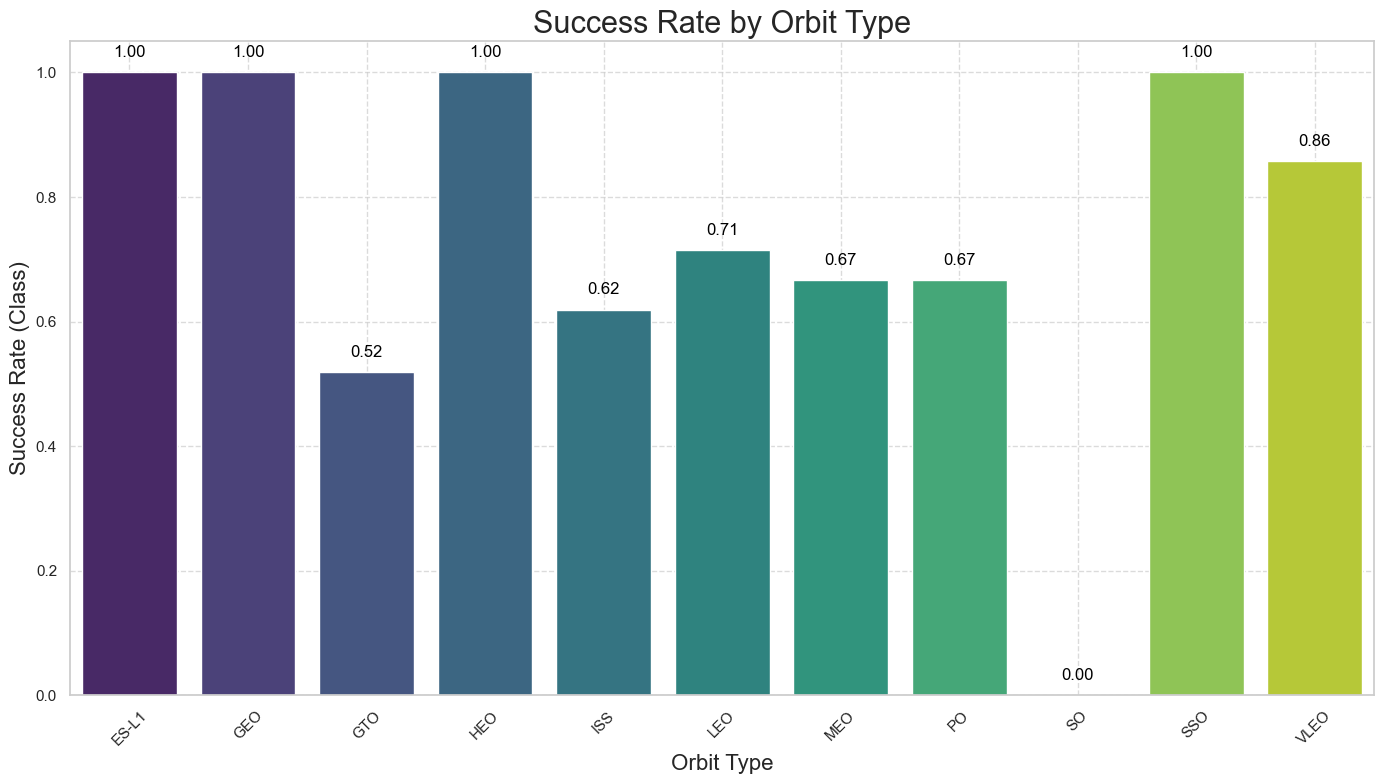

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Calculate the mean and standard deviation of Class for each Orbit type
means = df.groupby('Orbit')['Class'].mean()
std_devs = df.groupby('Orbit')['Class'].std()

# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='Orbit', 
    y='Class', 
    data=df, 
    palette='viridis',  # Use a color palette that is visually appealing
    ci=None,  # Remove default confidence intervals
    order=means.index  # Order by calculated means for consistent annotation
)

# Annotate each bar with its mean value
for i, (mean, std_dev) in enumerate(zip(means, std_devs)):
    ax.text(i, mean + 0.02, f'{mean:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Add a title and labels with increased font size
plt.title('Success Rate by Orbit Type', fontsize=22)
plt.xlabel('Orbit Type', fontsize=16)
plt.ylabel('Success Rate (Class)', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.


**High success rate:** We can see than ES-L1, SSO, HEO and GEO has very high success rate of 100%

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


<Figure size 1440x1008 with 0 Axes>

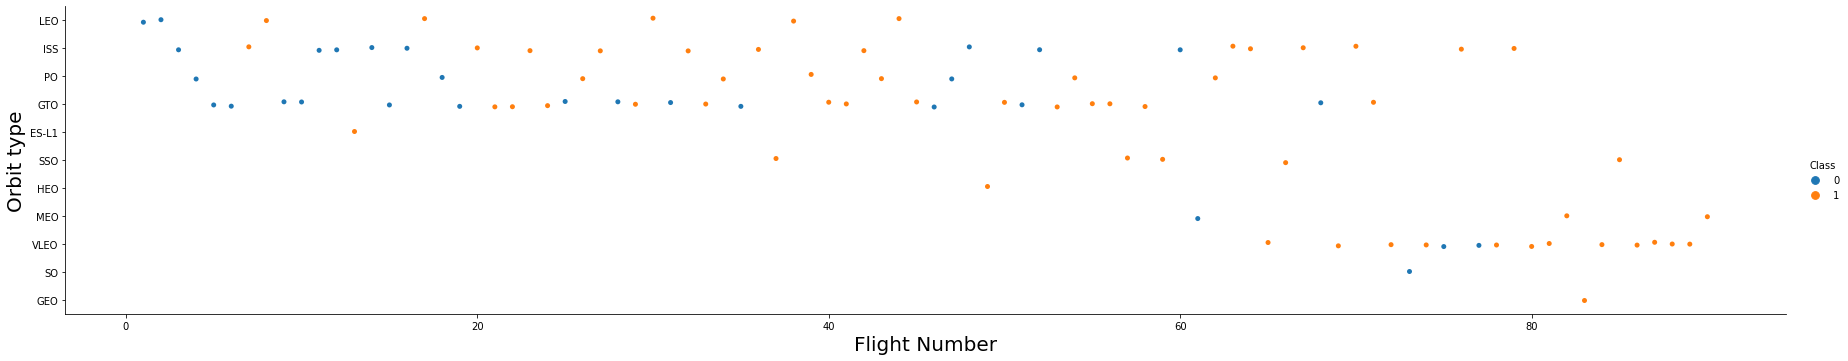

In [21]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(20,14))
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit type",fontsize=20)
plt.show()

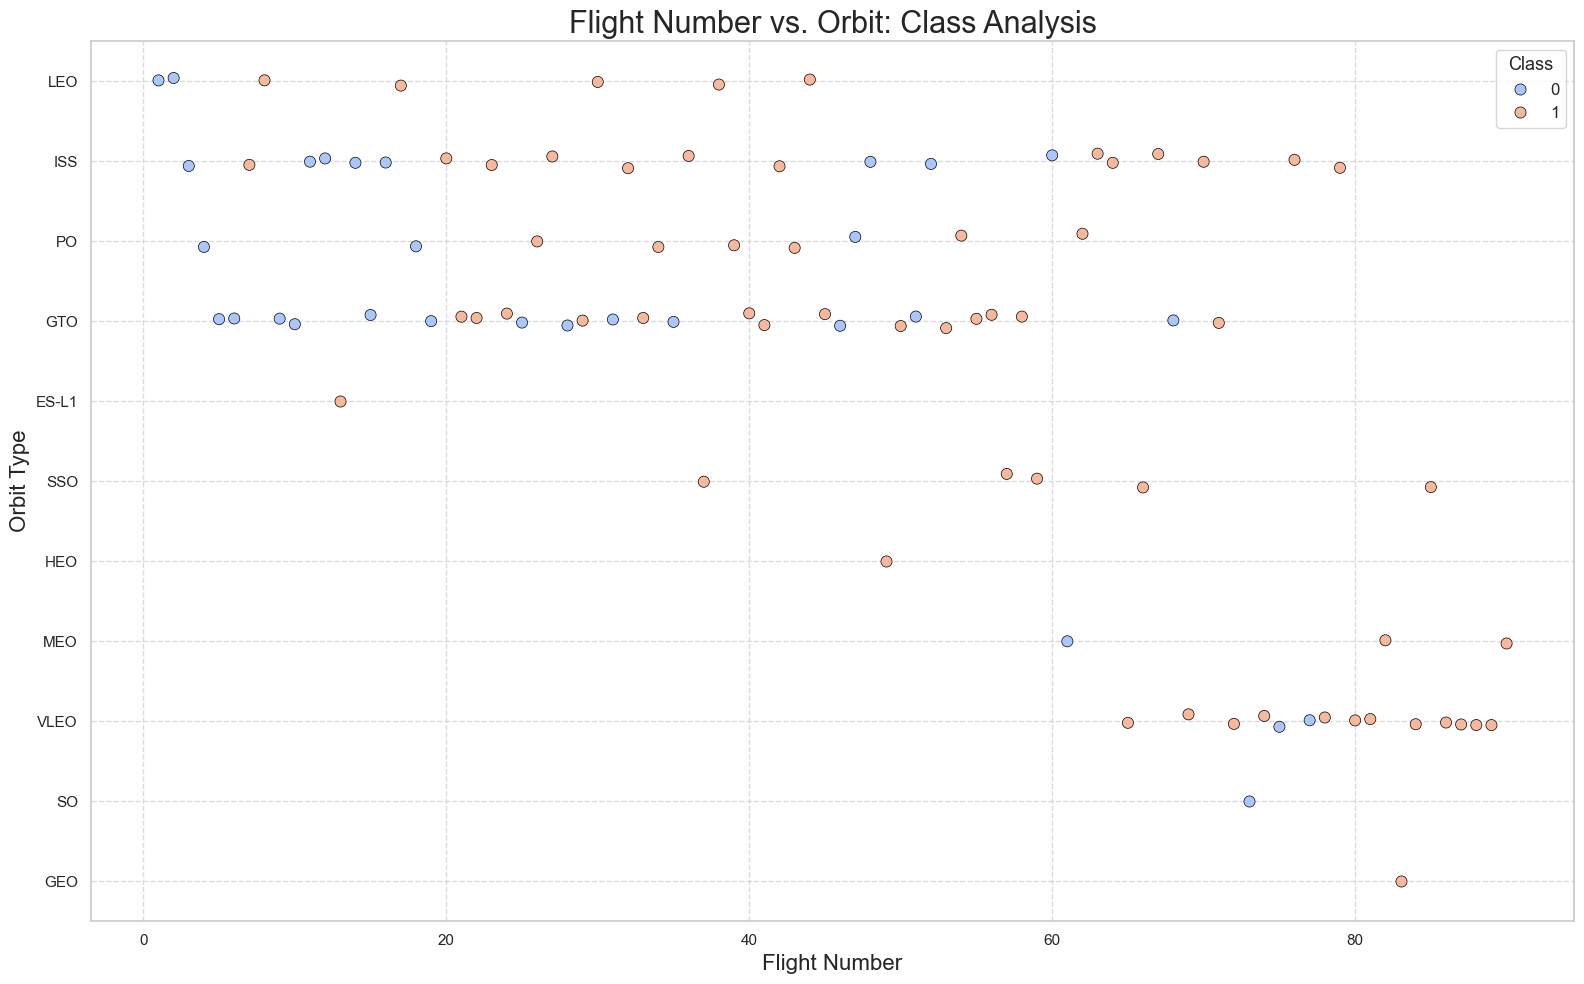

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a plot with improved aesthetics
plt.figure(figsize=(16, 10))
ax = sns.stripplot(
    x='FlightNumber', 
    y='Orbit', 
    hue='Class', 
    data=df, 
    jitter=True,  # Add jitter to prevent overlapping points
    palette='coolwarm',  # Use a distinct color palette for better differentiation
    size=8,  # Increase the size of the points
    alpha=1,  # Set transparency for better visibility
    marker='o',  # Use a circle marker
    edgecolor='black',  # Add edge color for better point visibility
    linewidth=0.5  # Set the edge width
)

# Add a title and labels with increased font size
plt.title('Flight Number vs. Orbit: Class Analysis', fontsize=22)
plt.xlabel('Flight Number', fontsize=16)
plt.ylabel('Orbit Type', fontsize=16)

# Customize the legend
plt.legend(title='Class', title_fontsize='13', loc='upper right', fontsize='12')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the layout
plt.tight_layout()

# Show plot
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


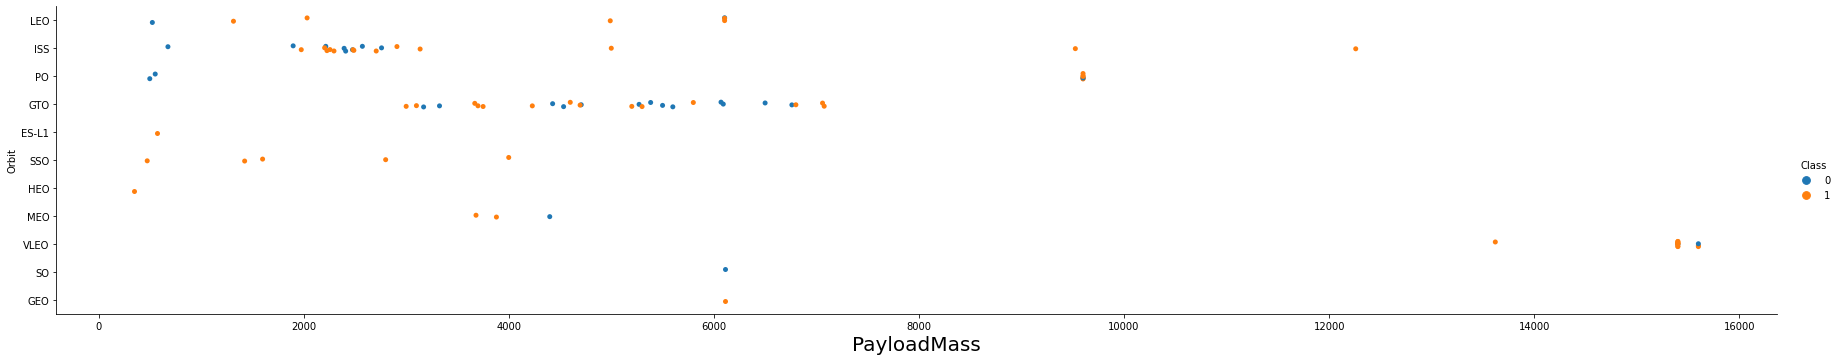

In [23]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x='PayloadMass', hue="Class", data=df, aspect = 5)
plt.xlabel("Orbit type",fontsize=20)
plt.xlabel('PayloadMass',fontsize=20)
plt.show()

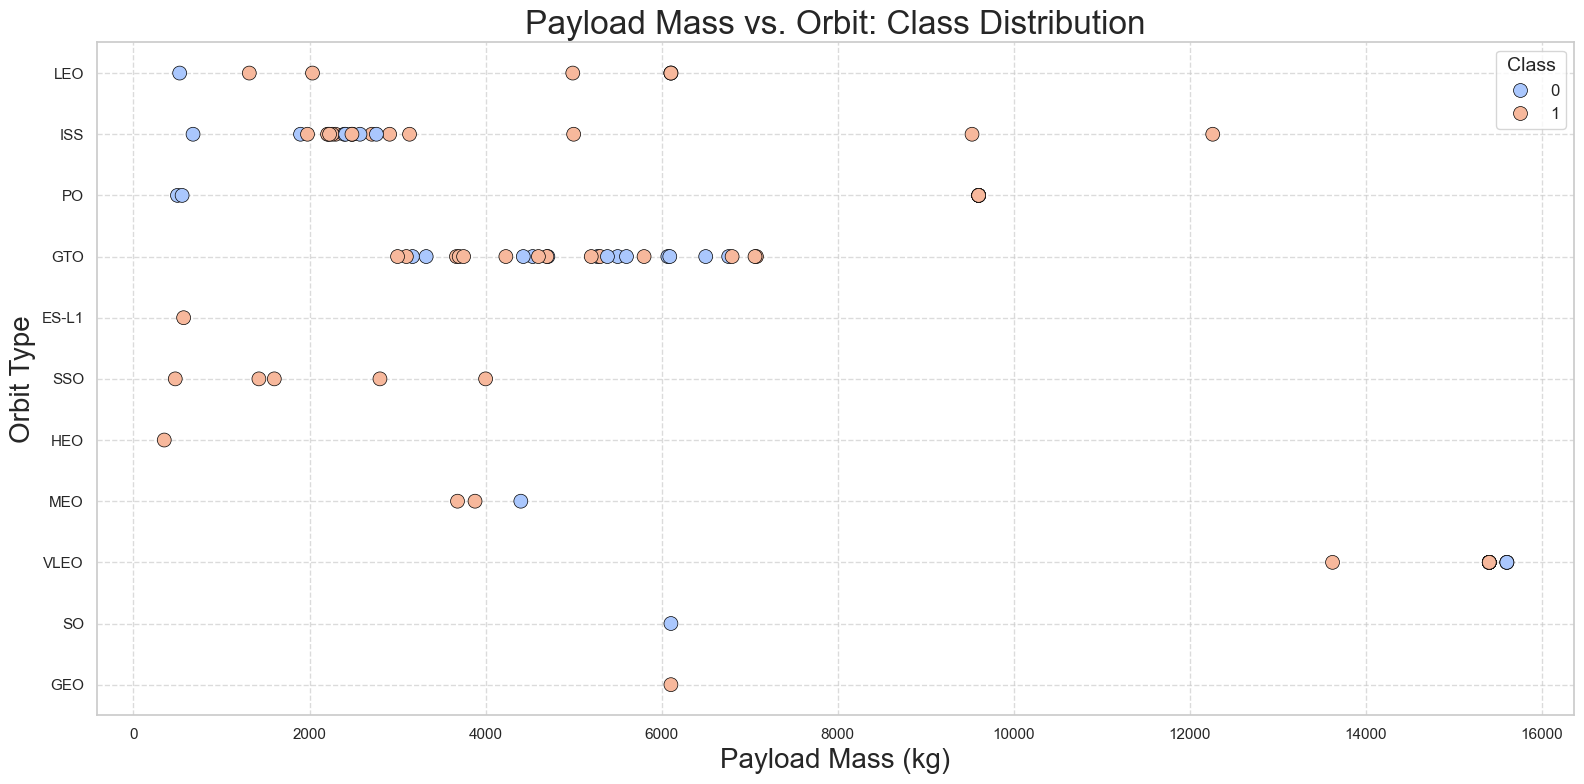

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a plot with improved aesthetics
plt.figure(figsize=(16, 8))

# Create the scatter plot
ax = sns.scatterplot(
    x='PayloadMass', 
    y='Orbit', 
    hue='Class', 
    data=df, 
    palette='coolwarm',  # Use a color palette that enhances distinction
    s=100,  # Size of the markers
    alpha=1.0,  # Transparency of the markers
    edgecolor='black',  # Add edge color for better point visibility
    linewidth=0.5  # Set the edge width
)

# Add a title and labels with increased font size
plt.title('Payload Mass vs. Orbit: Class Distribution', fontsize=24)
plt.xlabel('Payload Mass (kg)', fontsize=20)
plt.ylabel('Orbit Type', fontsize=20)

# Customize the legend
plt.legend(title='Class', title_fontsize='14', loc='best', fontsize='12')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the layout
plt.tight_layout()

# Show plot
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [21]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [22]:
df['year'] = Extract_year('')

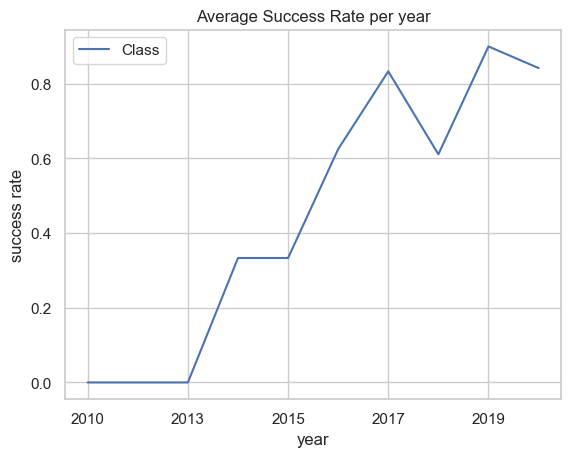

In [23]:
df[['Class','year']].groupby('year').mean().plot()
plt.title('Average Success Rate per year')
plt.ylabel('success rate')
plt.xlabel('year');

C:\Users\navee\AppData\Local\Temp\ipykernel_24836\2177231721.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


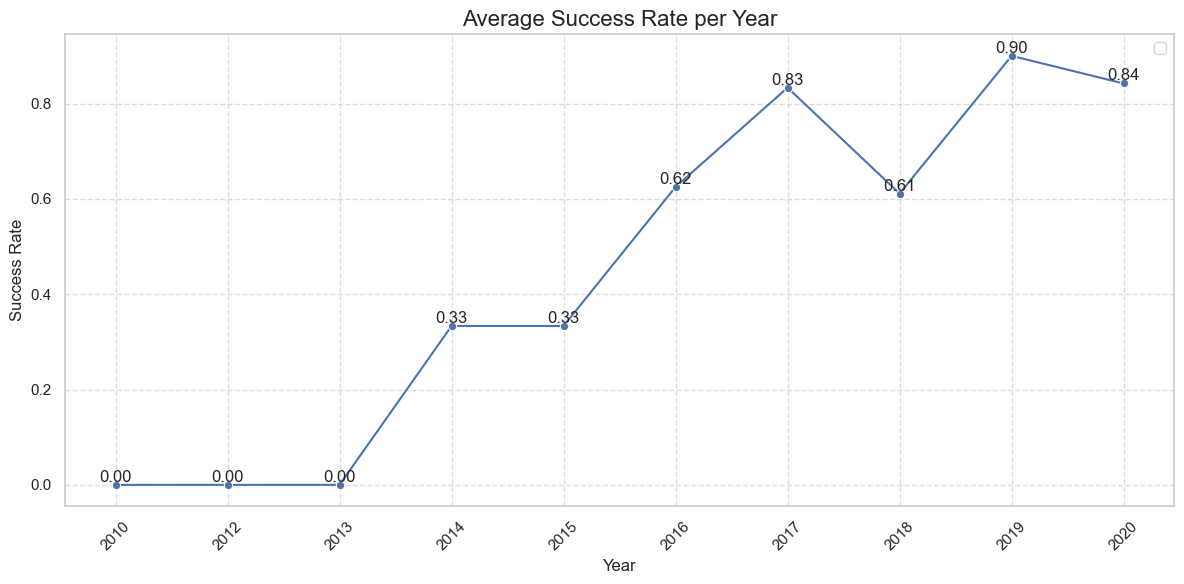

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'df' is your DataFrame
# If you don't have the data, you can create a sample DataFrame:
# df = pd.DataFrame({'year': range(2010, 2021), 'Class': np.random.rand(11)})

# Calculate the average success rate per year
success_rate = df[['Class', 'year']].groupby('year').mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Class', data=success_rate, marker='o')

# Add labels to each point
for x, y in zip(success_rate['year'], success_rate['Class']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Customize the plot
plt.title('Average Success Rate per Year', fontsize=16)
plt.ylabel('Success Rate', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Improve x-axis
plt.xticks(success_rate['year'], rotation=45)



plt.legend()
plt.tight_layout()
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [30]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [31]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [32]:
# HINT: use astype function
features_one_hot = features_one_hot.astype(np.float64)

In [33]:
features_one_hot.shape

(90, 80)

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [34]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
